In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import numpy as np

In [44]:
data = pd.read_csv("C:/Users/paul8/Downloads/churn.csv")
data.head()

,id,rate,usage_house,complaints,customer_left,reason_to_leave
0,1,normal,1007.152351,27,no,0
1,2,premium,953.463711,28,yes,0
2,3,normal,1027.009568,26,no,0
3,4,normal,984.807720,15,no,0
4,5,normal,968.184265,8,no,0


In [45]:
data = data.drop(['id','reason_to_leave'], axis=1)
#data = data.drop(['id'], axis=1)

In [46]:
encoder_1 = OneHotEncoder(sparse=False, drop='first')
encoded_1 = encoder_1.fit_transform(data[['rate']])
hot_df1 = pd.DataFrame(encoded_1, columns=encoder_1.get_feature_names_out(['rate']))

data = pd.concat([data,hot_df1], axis=1)
data = data.drop('rate', axis=1)
data.head()

c:\Users\paul8\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,usage_house,complaints,customer_left,rate_premium
0,1007.152351,27,no,0.0
1,953.463711,28,yes,1.0
2,1027.009568,26,no,0.0
3,984.807720,15,no,0.0
4,968.184265,8,no,0.0


In [47]:
data['customer_left'] = data['customer_left'] == 'yes'
data.head()

,usage_house,complaints,customer_left,rate_premium
0,1007.152351,27,False,0.0
1,953.463711,28,True,1.0
2,1027.009568,26,False,0.0
3,984.807720,15,False,0.0
4,968.184265,8,False,0.0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['customer_left'],axis=1), data['customer_left'], test_size=0.3, random_state=42)
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [63]:
importance = permutation_importance(model, X_test,
y_test,n_repeats=10,random_state=42,scoring='neg_mean_absolute_error')

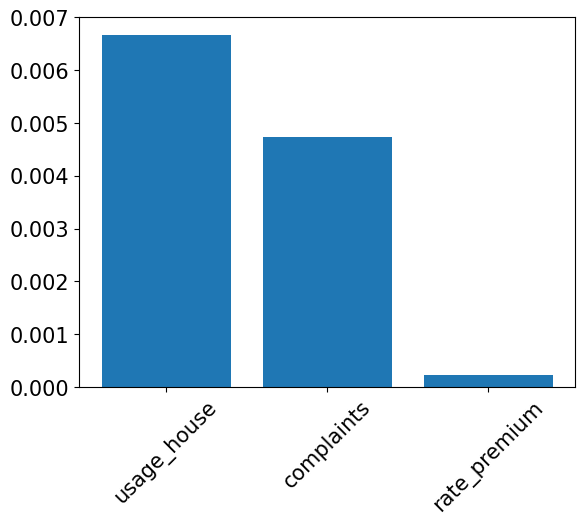

In [64]:
pos = np.arange(len(importance.importances_mean))
plt.bar(pos,importance.importances_mean,tick_label=X_test.columns)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.show()

In [66]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted     0    1
Actual              
False      1980  140
True        806   74
